## 3.1 Using Multiple Features
To recap the tools used in lesson 2, reload packages and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn import linear_model

%matplotlib inline

boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:,:-1]
y = dataset['target'].values

### Model building with Statsmodels

In [3]:
#working with Matrices
import statsmodels.api as sm

#working with formulas
import statsmodels.formula.api as smf 

prepare a suitable input matrix, naming it Xc after having it incremented by an extra column containing the bias vector (a constant variable having the unit value):

In [4]:
# add column for constant to the X matrix
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()

In [5]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 12 May 2021   Prob (F-statistic):          6.72e-135
Time:                        19:39:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

#### Things to check
- the ratio of r-squared:adjusted r-squared does not exceed 20%, 0.741/0.734 = 1.01, that is just 1% over the standard R-squared.
- Coefficents should be checked for values too close to zero and those that are tend to have large standard errors. Statistical t-tests are the right tool to spot them
- If the Cond. No. is greater than 30, there is a high chance that multicolinearity is the cause of the unreliability

### Using formulas as an alternative

In [29]:
linear_regression_2 = smf.ols(formula = 'target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = dataset)
fitted_model2 = linear_regression_2.fit()

In [30]:
print(fitted_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 12 May 2021   Prob (F-statistic):          6.72e-135
Time:                        19:41:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Results are the same but the code necessary was much more since we are using every attribute in the dataset

### The Correlation Matrix

With multiple variables contributing to the prediction of the response, we must now consider if each variable's contribution to the variance of the response is unique (partial correlation) or if it shares that contribution with one or more predictors (collinearity)

A correlation Matrix is the best tool to try and spot collinearity

In [8]:
correlation_matrix = X.corr()
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


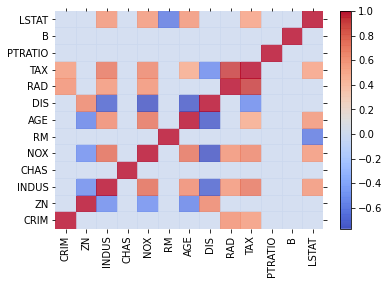

In [9]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', \
    top='off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5)

An even more automatic way to detect such associations (and figure out numerical problems in a matrix inversion) is to use eigenvectors. Explained in layman's terms, eigenvectors are a very smart way to recombine the variance among the variables, creating new features accumulating all the shared variance. 

In [10]:
corr = np.corrcoef(X,rowvar=0)
eigenvalues,eigenvectors = np.linalg.eig(corr)

After extracting the eigenvalues, we print them in descending order and look for any element whose value is near to zero or small compared to the others. Near zero values can represent a real problem for normal equations and other optimization methods based on matrix inversion. Small values represent a high but not critical source of multicollinearity. If you spot any of these low values, keep a note of their index in the list (Python indexes start from zero).

In [11]:
for i in eigenvalues:
    print(i)

6.126848826445705
1.433275122186443
1.242616673040985
0.8575751081087002
0.834815936777857
0.6574071753978652
0.5353560861550767
0.3960973144681358
0.06350926044147075
0.27694332970202157
0.16930297530692245
0.18601436703935847
0.22023782492946117


Index 8 has a value close to zero, so we check the eigenvector

In [12]:
for i in eigenvectors[:,8]:
    print(i)

-0.045952303827847936
0.08091897301176933
0.25107654027057685
-0.03592171462935356
-0.043630446361039465
-0.04556709567573044
0.03855068279476637
0.01829853778353471
0.633489719624263
-0.7202334480143463
-0.023398052299025703
0.004463072830573146
-0.02443167734305663


Index 2, 8, and 9 have values far from 0 so we check those variable names

In [13]:
print(variables[2], variables[8],variables[9])

INDUS RAD TAX


These variables are exhibiting multicollinearity. But how can we fix this issue? Removal can sometimes be the best solution but there are other solutions that we'll look at later

## 3.2 Revisiting gradient descent

### Feature Scaling
variables can be measured in decimals, percents, or even thousands. To prevent more weight being given to a variable with a higher value range, we must use feature scaling

Feature scaling can be achieved through standardization and normalization

normilzation rescales the values in an interval between 1 and 0 and standardization operates by removing the mean and dividing by the standard deviation to obtain the variance

An important reminder when applying feature scaling is that changing the scale of the features implies that you will have to use rescaled features also for predictions, unless you can recalculate the coefficients as if the variables had never been rescaled.

## 3.3 Estimating feature importance

After confirming the values of the coefficients of the model we have built, and understandind the basic statistics, we can start auditing our work.

A first check is to use domain knowledge you already have to make sure the coefficients make sense (ie, squarefootage should have a positive coefficient when predicting home price). When coefficients do not correspond to our expectations, we have reversals. Reversals are not uncommon and reveal that things work in a different way than we expect. Multicollinearity, reversals could just be due to higher uncertainty of the estimates, so much so that the optimization assigned the wrong sign.

A second check is to look at the impact of the predictor variables. Are some variables able to be removed to make the model simpler, and less errant, due to low coefficients? 

In fact, if our objective is not simply to fit our present data maximally with a formula, but to also fit future data well, it is necessary to apply the principle of Occam's razor. This suggests that, given more correct answers, simpler models are always preferable to more complex ones. The core idea is not to make an explanation, that is a linear model, more complex than it should be, because complexity may hide overfitting.

### Inspecting standardized coefficients
In multiple regression, we can read each single coefficient as the unit change inducted on the response variable by each predictor (keeping the other predictors constant).

Larger coefficients seem to impact more on the result of the linear combination; however, as we noticed while revisiting gradient descent, different variables may have different scales and their coefficients may incorporate this. Being smaller or larger in terms of coefficient may just be because of the variable's relative scale in comparison to the other features involved in the analysis.

Using standardized coefficients, we can therefore confidently rank our variables and spot those contributing less.

In [14]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()

#this will allow us to establish a sequence of operations to be done on our data
#execute a statistical standardization on the data before regressing it, thus outputting standardized coefficients
Stand_coef_linear_reg = make_pipeline(standardization, linear_regression)

#### Nonstandardized coefficients

In [16]:

linear_regression.fit(X,y)
for coef, var in sorted(zip(map(abs,linear_regression.coef_),
          dataset.columns[:-1]), reverse=True):
          print ("%6.3f %s" % (coef,var))

17.767 NOX
 3.810 RM
 2.687 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.108 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


#### Standardized Coefficients

In [17]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in \
sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), \
dataset.columns[:-1]), reverse=True):
              print ("%6.3f %s" % (coef,var))

 3.744 LSTAT
 3.104 DIS
 2.674 RM
 2.662 RAD
 2.077 TAX
 2.061 PTRATIO
 2.057 NOX
 1.082 ZN
 0.928 CRIM
 0.849 B
 0.682 CHAS
 0.141 INDUS
 0.019 AGE


Having all the predictors on a similar scale now, we can easily provide a more realistic interpretation of each coefficient. Clearly, it appears that a unit change has more impact when it involves the variables LSTAT, DIS, RM, RAD, and TAX. LSTAT is the percentage of lower status population, and this aspect explains its relevancy.

### Comparing models by R-squared

R-squared can estimate how good a model is; therefore, by comparing the R-squared of our model against alternative models where the variables have been removed, we can get an idea of how predictive each removed variable is. All we have to do is compute the difference between the coefficients of determination of the initial model against the model without that variable. If the difference is large, the variable is very important in the determination of a better R-squared and of a better model.

In our case, we have to first record what the R-squared is when we build the model with all the variables present. We can name such a value our baseline of comparison:

In [18]:
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False,fit_intercept=True)
def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f'%r2_est(X,y))

Baseline R2: 0.741


In [19]:
#now we test each variable by removing one at a time
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - r2_est(X.values[:,selection],y)), dataset.columns[j]))
for imp, varname in sorted(r2_impact, reverse=True):
    print('%6.3f %s'%(imp,varname))

 0.056 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 CRIM
 0.006 TAX
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


These values show how much the variable contributes to the R-squared value.

## 3.4 Interaction Models
Real world data is often not linearly associated. Sometimes we must transform variables in order to achieve a better model

### Discovering interactions

Interactions between predictors occur when the effect on the response variable by one of them varies in respect to the value of the other predictors

Finding interaction terms can be achieved in two different ways, the first one being domain knowledge—that is, knowing directly the problem you are modeling and incorporating your expertise in it. When you do not have such an expertise, an automatic search over the possible combinations will suffice if it is well tested using a revealing measure such as R-squared.

The best way to illustrate the automatic search approach is to show an example in Python using the PolynomialFeatures from Scikit-learn, a function that allows both interactions and polynomial expansions

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False,fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)

In [21]:
def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))
baseline = r2_est(X,y)
print ('Baseline R2: %0.3f' % baseline)

Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

Baseline R2: 0.741


After recalling the baseline R-squared value, the code creates a new input data matrix using the fit_transform method, enriching the original data with the interaction effects of all the variables.

After recalling the baseline R-squared value, the code creates a new input data matrix using the fit_transform method, enriching the original data with the interaction effects of all the variables. At this point, we create a series of new linear regression models, each one containing all the main effects plus a single interaction. We measure the improvement, calculate the difference with the baseline, and then report only interactions over a certain threshold. We can decide on a threshold just above zero or a threshold we determine based on a statistical test. 

In [22]:
for k,effect in enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = variables[effect==1]
    increment = r2_est(Xi[:,list(range(0,main_effects)) + [main_effects+k]],y) - baseline
    if increment > 0.01:
        print ('Adding interaction %8s *%8s R2: %5.3f' % (termA, termB, increment))

Adding interaction     CRIM *    CHAS R2: 0.011
Adding interaction     CRIM *      RM R2: 0.021
Adding interaction       ZN *      RM R2: 0.013
Adding interaction    INDUS *      RM R2: 0.038
Adding interaction    INDUS *     DIS R2: 0.013
Adding interaction      NOX *      RM R2: 0.027
Adding interaction       RM *     AGE R2: 0.024
Adding interaction       RM *     DIS R2: 0.018
Adding interaction       RM *     RAD R2: 0.049
Adding interaction       RM *     TAX R2: 0.054
Adding interaction       RM * PTRATIO R2: 0.041
Adding interaction       RM *       B R2: 0.020
Adding interaction       RM *   LSTAT R2: 0.064


Relevant interaction effects are clearly made up by the variable 'RM' (one of the most important ones, as seen before) and the strongest improvement is given by its interaction with another key feature, LSTAT. An important take away would be that we add it to our original data matrix, as a simple multiplication between the two:

In [23]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']

print ('R2 of a model with RM*LSTAT interaction: %0.3f' % r2_est(Xi,y))

R2 of a model with RM*LSTAT interaction: 0.805


## 3.5 Polynomial Regression
- Polynomial expansion rapidly increases the number of predictors
- Higher-degree polynomials translate into high powers of the predictors, posing problems for numeric stability, thus requiring suitable numeric formats or standardizing numeric values that are too large

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

First lets look at a simple linear model using LSTAT

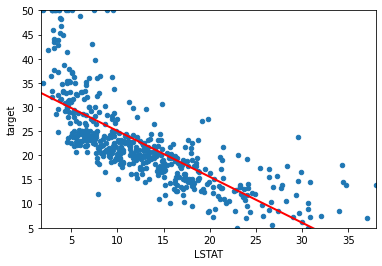

In [25]:
predictor = 'LSTAT'
x = dataset['LSTAT'].values.reshape((observations,1))
xt = np.arange(0,50,0.1).reshape((-1,1))
x_range = [dataset[predictor].min(),dataset[predictor].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

Our first fit is the linear one (a simple linear regression) and from the scatterplot we can notice that the line is not representing well the cloud of points relating to 'LSTAT' with the response; most likely we need a curve. Instead of testing a second degree transformation that will turn into a parabola, we immediately try a cubic transformation: using two bends, we should obtain a better fit:

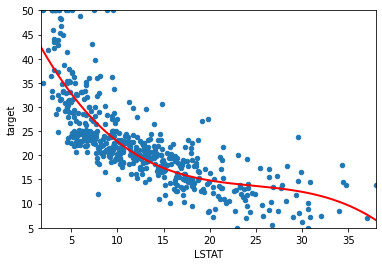

In [26]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

### Higher Degree Transformations

In [27]:
for d in [1,2,3,5,15]:
    create_poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(),linear_regression)
    model = poly.fit(x,y)
   
    print ("R2 degree - %2i polynomial :%0.3f" %(d,r2_score(y,model.predict(x))))

R2 degree -  1 polynomial :0.544
R2 degree -  2 polynomial :0.641
R2 degree -  3 polynomial :0.658
R2 degree -  5 polynomial :0.682
R2 degree - 15 polynomial :0.695


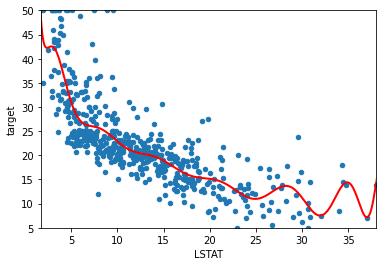

In [28]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, model.predict(xt), '-',color='red', linewidth=2)